In [6]:
import pandas as pd

xls = pd.ExcelFile("C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\ECOMM DATA - Copy.xlsx")

sheet_names = xls.sheet_names
print(sheet_names)


['Orders', 'Returns', 'People']


In [8]:
sales_data_sheet2 = pd.read_excel("C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\ECOMM DATA - Copy.xlsx", sheet_name="Returns")

print(sales_data_sheet2.columns)

if 'Quantity' in sales_data_sheet2.columns and 'Sales' in sales_data_sheet2.columns:
    sales_data_sheet2['Revenue'] = sales_data_sheet2['Quantity'] * sales_data_sheet2['Sales']
    total_sales_sheet2 = sales_data_sheet2['Revenue'].sum()
    print("Total Sales Revenue for Sheet 'Returns':", total_sales_sheet2)
else:
    print("Columns 'Quantity' and/or 'Sales' not found in sheet 'Returns'. Please verify the column names.")


Index(['Returned', 'Order ID', 'Market'], dtype='object')
Columns 'Quantity' and/or 'Sales' not found in sheet 'Returns'. Please verify the column names.


Total Sales Revenue: 61821272.47008


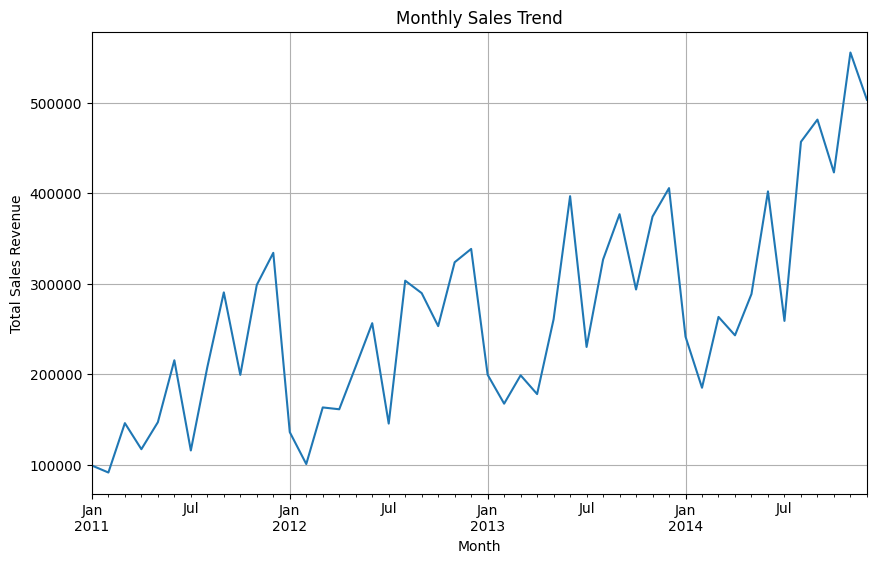

Top 10 Best-Selling Products:
Product Name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: Quantity, dtype: int64


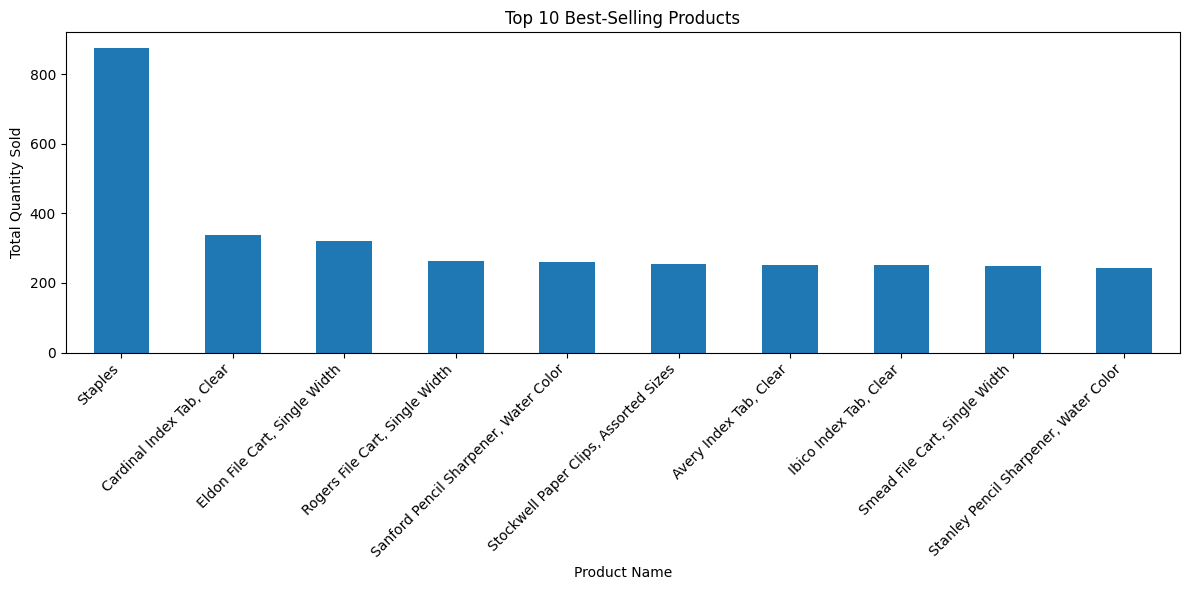

In [12]:
orders_data['Revenue'] = orders_data['Quantity'] * orders_data['Sales']

total_sales = orders_data['Revenue'].sum()
print("Total Sales Revenue:", total_sales)

orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])

sales_trend = orders_data.groupby(orders_data['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.show()

best_selling_products = orders_data.groupby('Product Name')['Quantity'].sum().nlargest(10)
print("Top 10 Best-Selling Products:")
print(best_selling_products)

plt.figure(figsize=(12, 6))
best_selling_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
orders_data['Discounted Revenue'] = (orders_data['Sales'] - orders_data['Discount']) * orders_data['Quantity']

total_discounted_sales = orders_data['Discounted Revenue'].sum()
print("Total Discounted Sales Revenue:", total_discounted_sales)

Total Discounted Sales Revenue: 61796283.43808


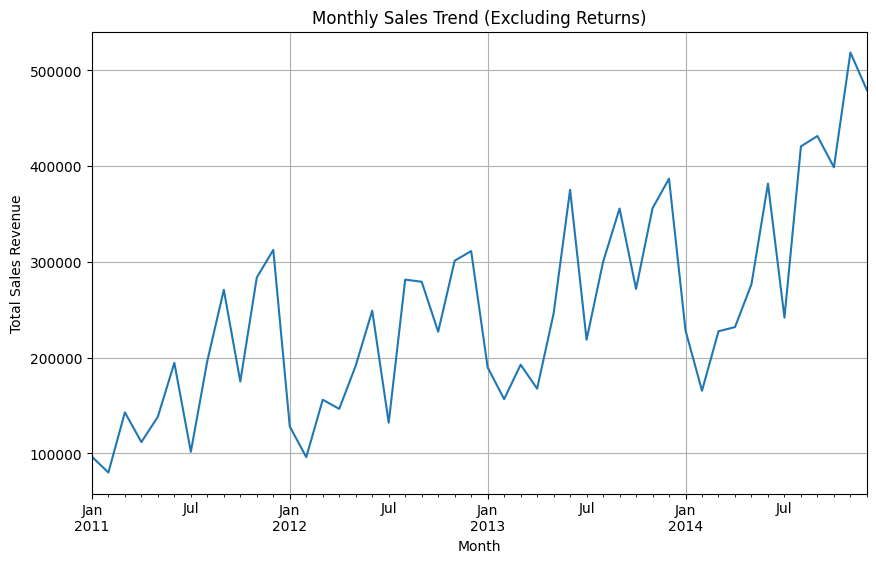

Top 10 Best-Selling Products (Excluding Returns):
Product Name
Staples                                  802
Eldon File Cart, Single Width            310
Cardinal Index Tab, Clear                303
Rogers File Cart, Single Width           256
Smead File Cart, Single Width            250
Stockwell Paper Clips, Assorted Sizes    249
Sanford Pencil Sharpener, Water Color    243
Ibico Index Tab, Clear                   241
Avery Index Tab, Clear                   235
Stanley Pencil Sharpener, Water Color    227
Name: Quantity, dtype: int64


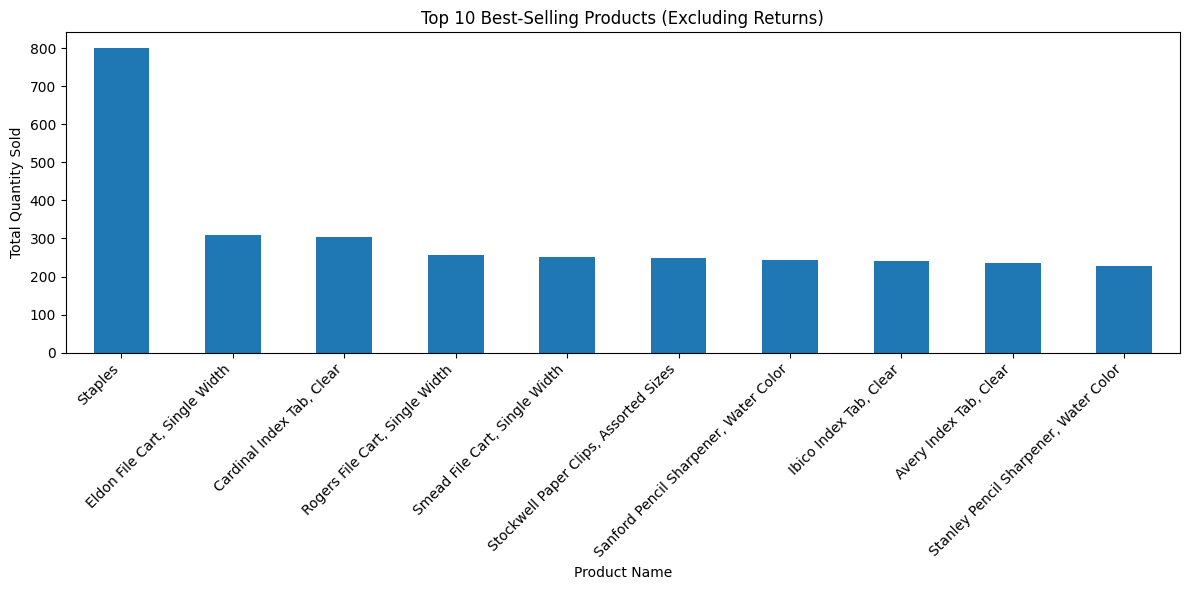

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

orders_data = pd.read_excel("C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\ECOMM DATA - Copy.xlsx", sheet_name="Orders")

returns_order_ids = returns_data['Order ID'].unique()
orders_data = orders_data[~orders_data['Order ID'].isin(returns_order_ids)]

orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])

sales_trend = orders_data.groupby(orders_data['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line')
plt.title('Monthly Sales Trend (Excluding Returns)')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.show()

best_selling_products_data = orders_data[~orders_data['Order ID'].isin(returns_order_ids)]

best_selling_products = best_selling_products_data.groupby('Product Name')['Quantity'].sum().nlargest(10)
print("Top 10 Best-Selling Products (Excluding Returns):")
print(best_selling_products)

plt.figure(figsize=(12, 6))
best_selling_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products (Excluding Returns)')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd

orders_data = pd.read_excel("C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\ECOMM DATA - Copy.xlsx", sheet_name="Orders")
returns_data = pd.read_excel("C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\ECOMM DATA - Copy.xlsx", sheet_name="Returns")

total_sales_including_returns = (orders_data['Sales'] * orders_data['Quantity']).sum()

returns_order_ids = returns_data['Order ID'].unique()
orders_data_excluding_returns = orders_data[~orders_data['Order ID'].isin(returns_order_ids)]
total_sales_excluding_returns = (orders_data_excluding_returns['Sales'] * orders_data_excluding_returns['Quantity']).sum()

print("Total Sales Revenue Including Returns:", total_sales_including_returns)
print("Total Sales Revenue Excluding Returns:", total_sales_excluding_returns)

Total Sales Revenue Including Returns: 61821272.47008
Total Sales Revenue Excluding Returns: 57650698.207499996


In [7]:
import pandas as pd

returns_data = pd.read_excel("C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\ECOMM DATA - Copy.xlsx", sheet_name="Returns")

return_rate = returns_data['Returned'].value_counts(normalize=True) * 100

return_patterns = returns_data.groupby(['Market', 'Returned']).size().unstack(fill_value=0)

print("Return Rates:")
print(return_rate)
print("\nReturn Patterns:")
print(return_patterns)

Return Rates:
Returned
Yes    100.0
Name: proportion, dtype: float64

Return Patterns:
Returned       Yes
Market            
APAC           296
EU             284
LATAM          297
United States  296


In [8]:
people_data = pd.read_excel("C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\ECOMM DATA - Copy.xlsx", sheet_name="People")

customer_segmentation = people_data.groupby('Region')['Customer Name'].count()

print("\nCustomer Segmentation by Region:")
print(customer_segmentation)


Customer Segmentation by Region:
Region
Africa            1
Canada            1
Caribbean         1
Central           1
Central Asia      1
EMEA              1
East              1
North             1
North Asia        1
Oceania           1
South             1
Southeast Asia    1
West              1
Name: Customer Name, dtype: int64


In [ ]:
#TITANIC SURVIVAL PREDICTION

In [4]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])

X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

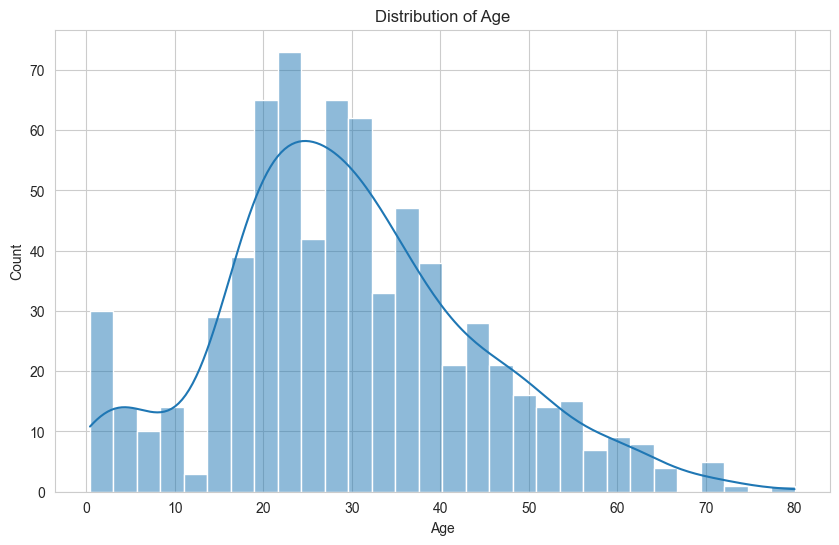

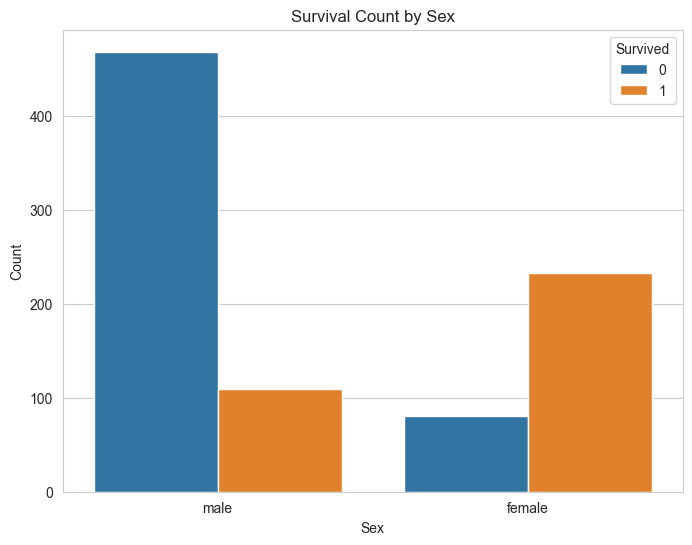

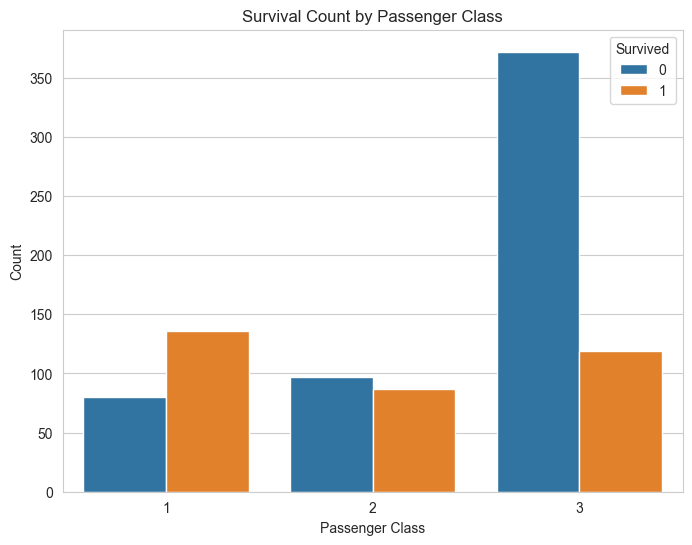

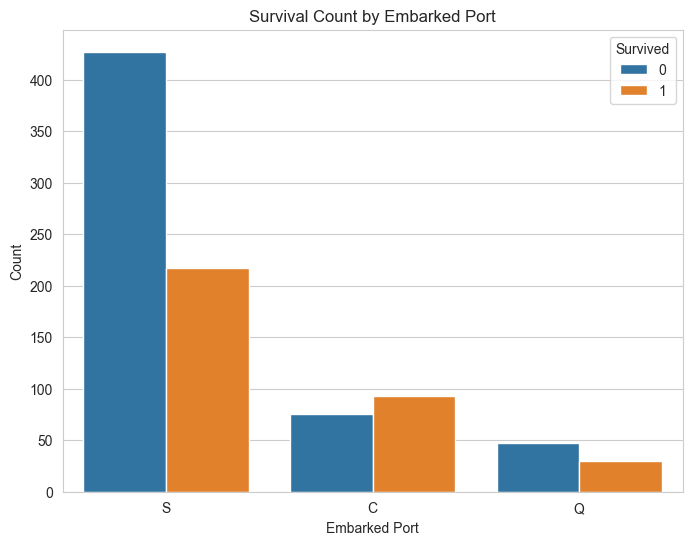

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv("C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\Titanic-Dataset - Copy.csv")

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [2]:
import pandas as pd

file_path = "C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\Titanic-Dataset - Copy.xlsx"

titanic_data = pd.read_excel(file_path)

print(titanic_data.head())

   PassengerId  Survived  Passengerclass  \
0            1         0               3   
1            2         1               1   
2            3         1               3   
3            4         1               1   
4            5         0               3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      

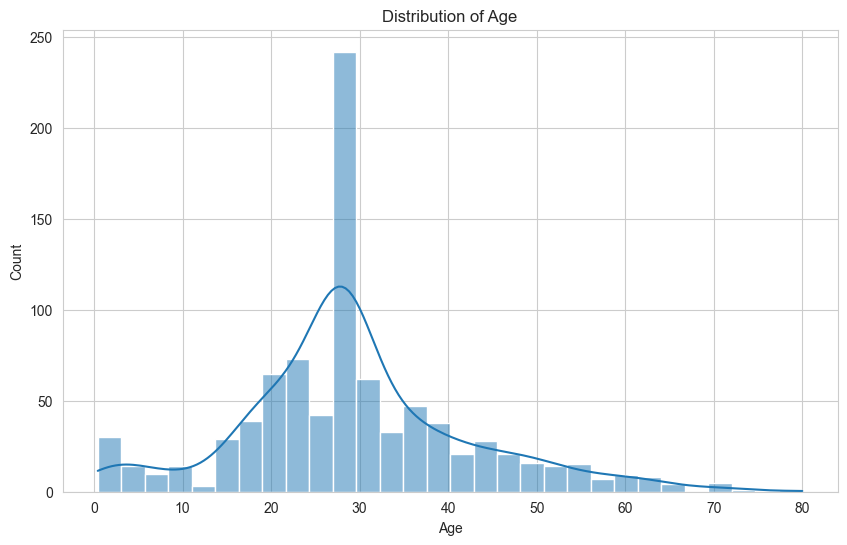

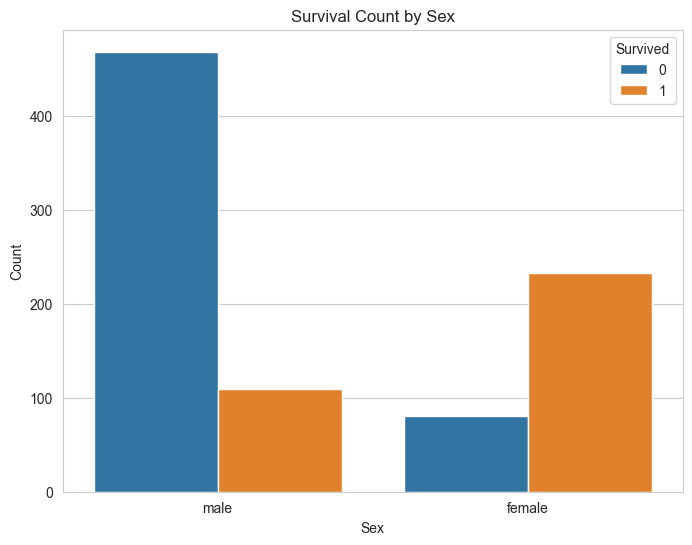

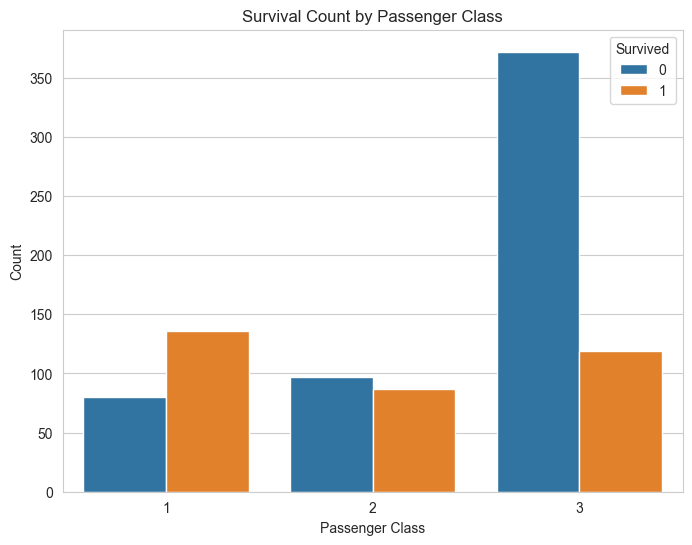

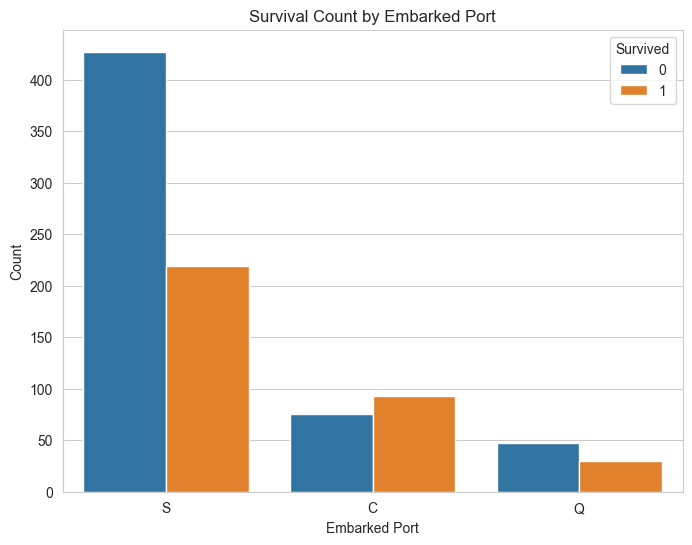

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_excel("C:\\Users\\MADHU\\Desktop\\intern\\DA Project Details\\Titanic-Dataset - Copy.xlsx")

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

titanic_data['Cabin'].fillna('Unknown', inplace=True)

most_frequent_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(most_frequent_embarked, inplace=True)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Passengerclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [13]:
#HR data

In [15]:
print(hr_data.columns)

Index(['Age', 'AttritionStatus', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [16]:
import pandas as pd

file_path = r"C:\Users\MADHU\Desktop\intern\DA Project Details\HR Data - Copy.xlsx"
hr_data = pd.read_excel(file_path)

unnecessary_columns = ['EmployeeCount', 'Over18', 'StandardHours']  # Specify columns to remove

hr_data.drop(columns=unnecessary_columns, inplace=True, errors='ignore')

hr_data.drop_duplicates(inplace=True)

hr_data.dropna(inplace=True)

output_file_path = r"C:\Users\MADHU\Desktop\intern\DA Project Details\HR Data Cleaned.xlsx"
hr_data.to_excel(output_file_path, index=False)

Attrition Rate:
 AttritionStatus
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


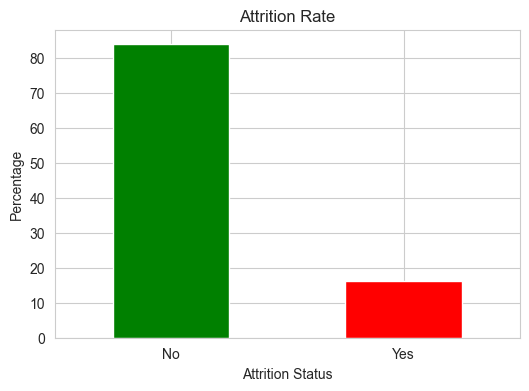

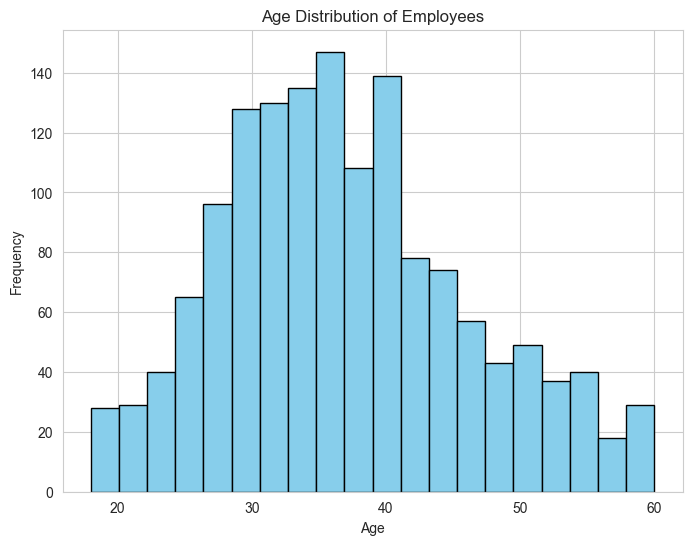

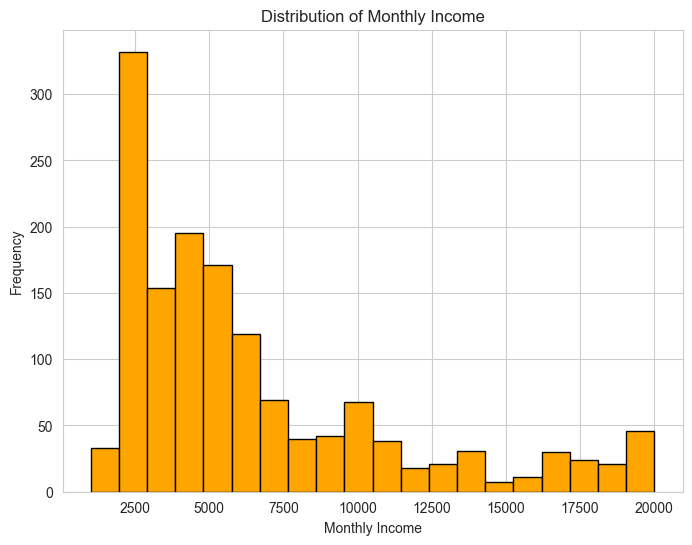

Job Satisfaction Counts:
 JobSatisfaction
1    289
2    280
3    442
4    459
Name: count, dtype: int64


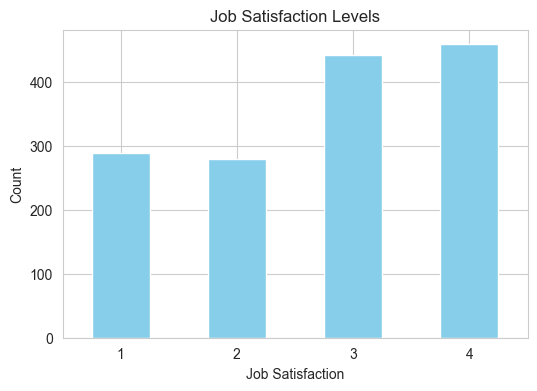

Performance Ratings Counts:
 PerformanceRating
3    1244
4     226
Name: count, dtype: int64


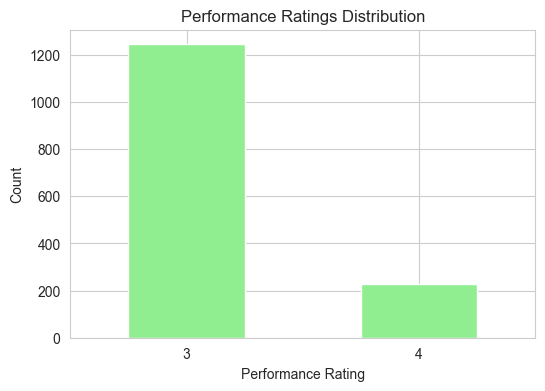

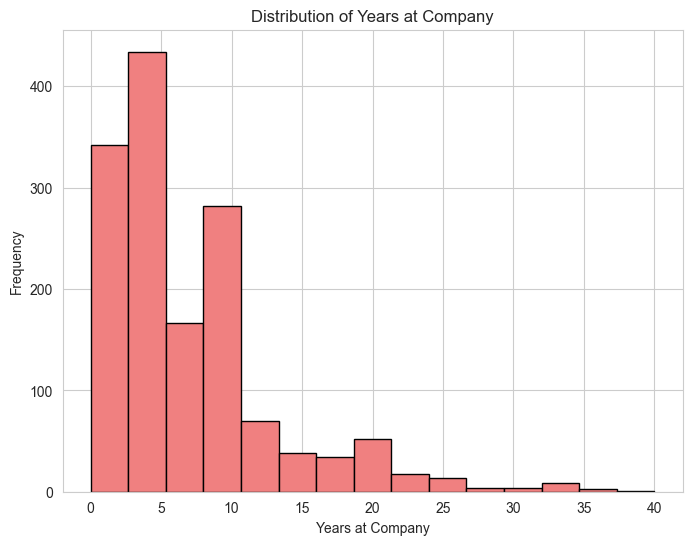

Training Times Last Year Counts:
 TrainingTimesLastYear
0     54
1     71
2    547
3    491
4    123
5    119
6     65
Name: count, dtype: int64


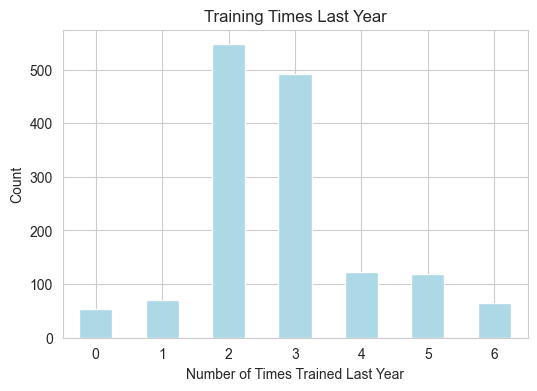

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\MADHU\Desktop\intern\DA Project Details\HR Data Cleaned.xlsx"
hr_data = pd.read_excel(file_path)

attrition_rate = hr_data['AttritionStatus'].value_counts(normalize=True) * 100
print("Attrition Rate:\n", attrition_rate)

plt.figure(figsize=(6, 4))
attrition_rate.plot(kind='bar', color=['green', 'red'])
plt.title('Attrition Rate')
plt.xlabel('Attrition Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
hr_data['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(hr_data['MonthlyIncome'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

job_satisfaction_counts = hr_data['JobSatisfaction'].value_counts().sort_index()
print("Job Satisfaction Counts:\n", job_satisfaction_counts)

plt.figure(figsize=(6, 4))
job_satisfaction_counts.plot(kind='bar', color='skyblue')
plt.title('Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

performance_counts = hr_data['PerformanceRating'].value_counts().sort_index()
print("Performance Ratings Counts:\n", performance_counts)

plt.figure(figsize=(6, 4))
performance_counts.plot(kind='bar', color='lightgreen')
plt.title('Performance Ratings Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
hr_data['YearsAtCompany'].hist(bins=15, color='lightcoral', edgecolor='black')
plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

training_counts = hr_data['TrainingTimesLastYear'].value_counts().sort_index()
print("Training Times Last Year Counts:\n", training_counts)

plt.figure(figsize=(6, 4))
training_counts.plot(kind='bar', color='lightblue')
plt.title('Training Times Last Year')
plt.xlabel('Number of Times Trained Last Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()